In [25]:
import os
os.chdir("C:/Users/Mutum/Courses/Udacity/AI programming with Python/data")

In [26]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [28]:
pokemon = pd.read_csv("pokemon.csv")
#pokemon.shape

In [29]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


## Bar Charts \.
A bar chart is used to depict the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level. A basic bar chart of frequencies can be created through the use of seaborn's countplot function:

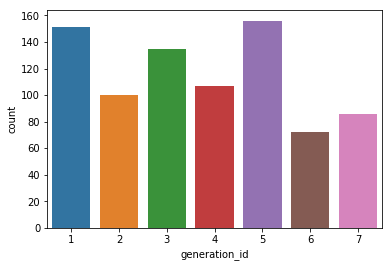

In [30]:
sns.countplot(x="generation_id",data=pokemon);

color_palette returns a list of RGB tuples. Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. Calling this function without any parameters returns the current / default palette, and we take the first color to be the color for all bars.

In [31]:
sns.color_palette() # color palette, and give a list of tuples

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [32]:
base_color = sns.color_palette()[0]

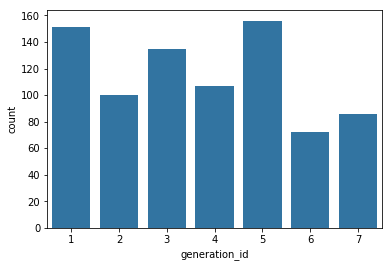

In [33]:
sns.countplot(data=pokemon,x="generation_id",color=base_color);

One thing that we might want to do with a bar chart is to sort the data in some way. For nominal-type data, one common operation is to sort the data in terms of frequency. With our data in a pandas DataFrame, we can use various DataFrame methods to compute and extract an ordering, then set that ordering on the "order" parameter:

In [34]:
pokemon["generation_id"].value_counts()

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

In [35]:
gen_order = pokemon["generation_id"].value_counts().index

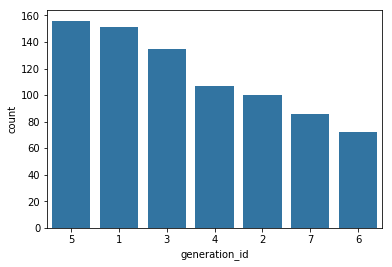

In [36]:
sns.countplot(data=pokemon,x="generation_id",color=base_color,order=gen_order);

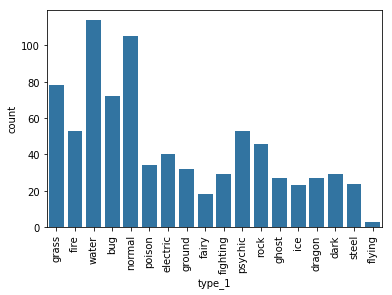

In [37]:
sns.countplot(data=pokemon,x="type_1",color=base_color)
plt.xticks(rotation =90);

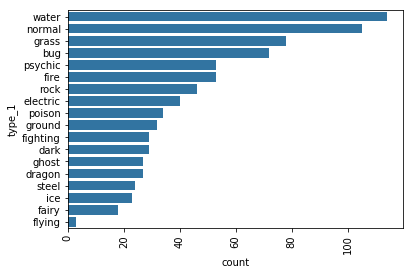

In [38]:
type_order = pokemon.type_1.value_counts().index
sns.countplot(data=pokemon,y="type_1",color=base_color,order=type_order)
plt.xticks(rotation =90);

In [39]:
type_order = pokemon.type_1.value_counts().index

In [40]:
pokemon.columns

Index(['id', 'species', 'generation_id', 'height', 'weight', 'base_experience',
       'type_1', 'type_2', 'hp', 'attack', 'defense', 'speed',
       'special-attack', 'special-defense'],
      dtype='object')

### Absolute vs. Relative Frequency
By default, seaborn's countplot function will summarize and plot the data in terms of absolute frequency, or pure counts. In certain cases, you might want to understand the distribution of data or want to compare levels in terms of proportions of the whole. In this case, you will want to plot the data in terms of relative frequency, where the height indicates the proportion of data taking each level, rather than the absolute count.
One method of plotting the data in terms of relative frequency on a bar chart is to just relabel the counts axis in terms of proportions. The underlying data will be the same, it will simply be the scale of the axis ticks that will be changed.

In [41]:
n_points = pokemon.shape[0]

In [42]:
# get proportion taken by most common group for derivation
# of tick marks

pokemon["type_1"].value_counts()
max_count = pokemon["type_1"].value_counts().max()
max_prop = pokemon["type_1"].value_counts().max()/n_points

water       114
normal      105
grass        78
bug          72
psychic      53
fire         53
rock         46
electric     40
poison       34
ground       32
fighting     29
dark         29
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type_1, dtype: int64

In [43]:
# generate tick mark locations and names

tick_props = np.arange(0,max_prop,0.02)
tick_names = ["{:0.2f}".format(v) for v in tick_props]

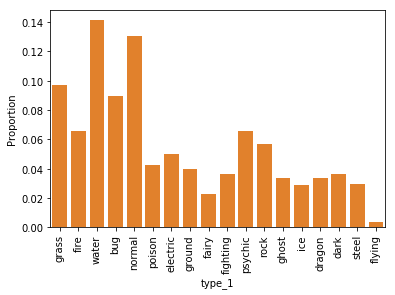

In [44]:
# generate plot

base_color = sns.color_palette()[1]
sns.countplot(data=pokemon,x="type_1",color=base_color)
plt.yticks(ticks=tick_props*n_points,labels=tick_names)
plt.ylabel("Proportion")
plt.xticks(rotation= 90);

In [45]:
np.sum(tick_props*n_points)

451.91999999999996

In [46]:
114 / pokemon.type_1.value_counts().sum()

0.1412639405204461

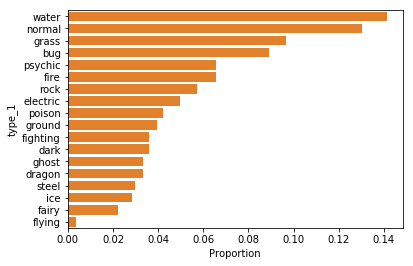

In [47]:
# Now putting it all together

# get proportion taken by most common group for derivation
# of tick marks

max_count = pokemon["type_1"].value_counts().max()
max_prop = pokemon["type_1"].value_counts().max()/n_points


order_type = pokemon["type_1"].value_counts().index  # get for ordering


# generate tick mark locations and names

tick_props = np.arange(0,max_prop,0.02)
tick_names = ["{:0.2f}".format(v) for v in tick_props]

# generate plot

base_color = sns.color_palette()[1]
sns.countplot(data=pokemon,y="type_1",color=base_color,order=order_type)
plt.xticks(ticks=tick_props*n_points,labels=tick_names)
plt.xlabel("Proportion");
# plt.yticks(rotation= 90);

Additional Variation
Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

Text(115, 0, '14.1%')

Text(0.5, 0, 'proportion')

Text(106, 1, '13.0%')

Text(0.5, 0, 'proportion')

Text(79, 2, '9.7%')

Text(0.5, 0, 'proportion')

Text(73, 3, '8.9%')

Text(0.5, 0, 'proportion')

Text(54, 4, '6.6%')

Text(0.5, 0, 'proportion')

Text(54, 5, '6.6%')

Text(0.5, 0, 'proportion')

Text(47, 6, '5.7%')

Text(0.5, 0, 'proportion')

Text(41, 7, '5.0%')

Text(0.5, 0, 'proportion')

Text(35, 8, '4.2%')

Text(0.5, 0, 'proportion')

Text(33, 9, '4.0%')

Text(0.5, 0, 'proportion')

Text(30, 10, '3.6%')

Text(0.5, 0, 'proportion')

Text(30, 11, '3.6%')

Text(0.5, 0, 'proportion')

Text(28, 12, '3.3%')

Text(0.5, 0, 'proportion')

Text(28, 13, '3.3%')

Text(0.5, 0, 'proportion')

Text(25, 14, '3.0%')

Text(0.5, 0, 'proportion')

Text(24, 15, '2.9%')

Text(0.5, 0, 'proportion')

Text(19, 16, '2.2%')

Text(0.5, 0, 'proportion')

Text(4, 17, '0.4%')

Text(0.5, 0, 'proportion')

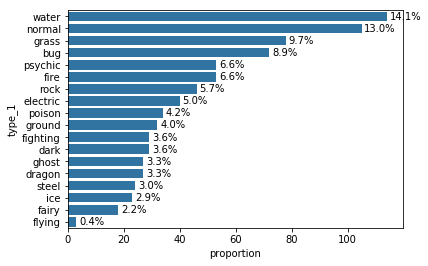

In [48]:
# create the plot

base_color = sns.color_palette()[0]
sns.countplot(data=pokemon,y="type_1",color=base_color,order=order_type);
# plt.xticks(rotation=90)

n_points= pokemon.shape[0]
type_counts = pokemon["type_1"].value_counts()
type_order = type_counts.index

for i in range(type_counts.shape[0]):
    count =type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(count + 1 ,i,pct_string,va="center") 
    plt.xlabel('proportion');

The xticks and yticks functions aren't only about rotating the tick labels. You can also get and set their locations and labels as well. The first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts. The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.
I've also added a ylabel call to make it clear that we're no longer working with straight count

### Counting missing data

visualization of missing values

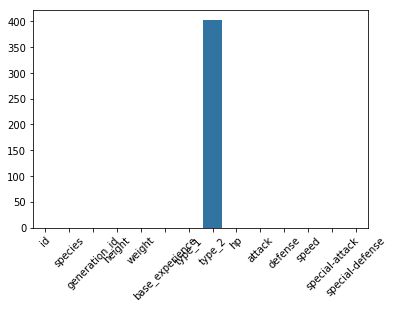

In [62]:
na_counts = pokemon.isna().sum()

sns.barplot(x=na_counts.index.values,y=na_counts,color=base_color)
plt.xticks(rotation=45);

In [63]:
na_counts.index.values

array(['id', 'species', 'generation_id', 'height', 'weight',
       'base_experience', 'type_1', 'type_2', 'hp', 'attack', 'defense',
       'speed', 'special-attack', 'special-defense'], dtype=object)

# Bar chart practise

Task 1: There have been quite a few Pokémon introduced over the series' history. How many were introduced in each generation? Create a bar chart of these frequencies using the 'generation_id' column.

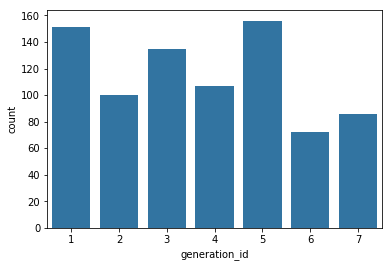

In [81]:

sns.countplot(x="generation_id",data = pokemon,color=sns.color_palette()[0]);

Task 2: Each Pokémon species has one or two 'types' that play a part in its offensive and defensive capabilities. How frequent is each type? The code below creates a new dataframe that puts all of the type counts in a single column.

In [88]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


# finished the above task

## Pie chart

A pie chart is a common univariate plot type that is used to depict relative frequencies for levels of a categorical variable. Frequencies in a pie chart are depicted as wedges drawn on a circle: the larger the angle or area, the more common the categorical value taken.

Unfortunately, pie charts are a fairly limited plot type in the range of scenarios where they can be used, and it is easy for chart makers to try and spice up pie charts in a way that makes them more difficult to read. If you want to use a pie chart, try to follow certain guidelines:
Make sure that your interest is in relative frequencies. Areas should represent parts of a whole, rather than measurements on a second variable (unless that second variable can logically be summed up into some whole).
Limit the number of slices plotted. A pie chart works best with two or three slices, though it's also possible to plot with four or five slices as long as the wedge sizes can be distinguished. If you have a lot of categories, or categories that have small proportional representation, consider grouping them together so that fewer wedges are plotted, or use an 'Other' category to handle them.
Plot the data systematically. One typical method of plotting a pie chart is to start from the top of the circle, then plot each categorical level clockwise from most frequent to least frequent. If you have three categories and are interested in the comparison of two of them, a common plotting method is to place the two categories of interest on either side of the 12 o'clock direction, with the third category filling in the remaining space at the bottom.
If these guidelines cannot be met, then you should probably make use of a bar chart instead. A bar chart is a safer choice in general. The bar heights are more precisely interpreted than areas or angles, and a bar chart can be displayed more compactly than a pie chart. There's also more flexibility with a bar chart for plotting variables with a lot of levels, like plotting the bars horizontally.
You can create a pie chart with matplotlib's pie function. This function requires that the data be in a summarized form: the primary argument to the function will be the wedge sizes.

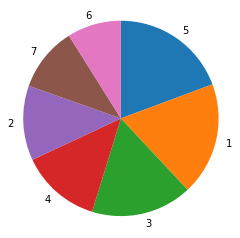

In [99]:
# code for the pie chart seen above
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');

To follow the guidelines in the bullet points above, I include the "startangle = 90" and "counterclock = False" arguments to start the first slice at vertically upwards, and will plot the sorted counts in a clockwise fashion. The axis function call and 'square' argument makes it so that the scaling of the plot is equal on both the x- and y-axes. Without this call, the pie could end up looking oval-shaped, rather than a circle.

Additional Variation
A sister plot to the pie chart is the **donut plot**. It's just like a pie chart, except that there's a hole in the center of the plot. Perceptually, there's not much difference between a donut plot and a pie chart, and donut plots should be used with the same guidelines as a pie chart. Aesthetics might be one of the reasons why you would choose one or the other. For instance, you might see statistics reported in the hole of a donut plot to better make use of available space.
To create a donut plot, you can add a "wedgeprops" argument to the pie function call. By default, the radius of the pie (circle) is 1; setting the wedges' width property to less than 1 removes coloring from the center of the circle.

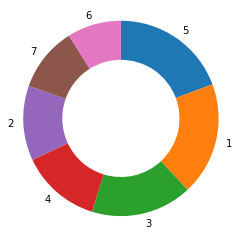

In [103]:
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4})
plt.axis('square');